In [231]:
import pandas as pd
import json
import os

# **Combine JSON Files**

In [232]:
# Corrected directory path with raw string
directory = r"C:\Users\Desktop\Analyze Spotify Listening Habits and Music Trends\my_spotify_data\Spotify Account Data"

# Initialize an empty list to store data
data = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.startswith('StreamingHistory_music_') and filename.endswith('.json'):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            json_data = json.load(file)
            data.extend(json_data)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)
# Display the first few rows of the DataFrame
print(df.head())

            endTime   artistName  \
0  2023-07-11 13:56  Central Cee   
1  2023-07-13 10:19   Kanye West   
2  2023-07-13 10:23    Sean Paul   
3  2023-07-13 10:27        USHER   
4  2023-07-13 10:33      Shakira   

                                           trackName  msPlayed  
0                                               Doja     18831  
1                                           Stronger    311866  
2  (When You Gonna) Give It Up to Me (feat. Keysh...    243880  
3                    More - RedOne Jimmy Joker Remix    219986  
4  Hips Don't Lie (feat. Wyclef Jean) - Live - De...    378734  


# **Perform EDA**

In [233]:
# Display basic information
print(df.info())

# Display basic statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20141 entries, 0 to 20140
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     20141 non-null  object
 1   artistName  20141 non-null  object
 2   trackName   20141 non-null  object
 3   msPlayed    20141 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 629.5+ KB
None
           msPlayed
count  2.014100e+04
mean   8.219381e+04
std    1.054156e+05
min    0.000000e+00
25%    1.250000e+03
50%    8.893000e+03
75%    1.816720e+05
max    1.216968e+06


In [234]:
# Convert endTime to datetime
df['endTime'] = pd.to_datetime(df['endTime'])

# Convert msPlayed to seconds
df['secondsPlayed'] = df['msPlayed'] / 1000
df['hoursPlayed'] = df['msPlayed'] /3600000
# Extract year and month
df['year'] = df['endTime'].dt.year
df['month'] = df['endTime'].dt.month

# Display the first few rows after transformation
print(df.head())

              endTime   artistName  \
0 2023-07-11 13:56:00  Central Cee   
1 2023-07-13 10:19:00   Kanye West   
2 2023-07-13 10:23:00    Sean Paul   
3 2023-07-13 10:27:00        USHER   
4 2023-07-13 10:33:00      Shakira   

                                           trackName  msPlayed  secondsPlayed  \
0                                               Doja     18831         18.831   
1                                           Stronger    311866        311.866   
2  (When You Gonna) Give It Up to Me (feat. Keysh...    243880        243.880   
3                    More - RedOne Jimmy Joker Remix    219986        219.986   
4  Hips Don't Lie (feat. Wyclef Jean) - Live - De...    378734        378.734   

   hoursPlayed  year  month  
0     0.005231  2023      7  
1     0.086629  2023      7  
2     0.067744  2023      7  
3     0.061107  2023      7  
4     0.105204  2023      7  


In [235]:
total_tracks = df.shape[0]
total_unique_track_played=df['trackName'].nunique()
# Calculate the total listening time in seconds
total_listening_time_hours = df['hoursPlayed'].sum()

# Convert total listening time to hours for better readability
total_listening_time_seconds = df['secondsPlayed'].sum()

# Print the results
print(f"Total play count: {total_tracks}")
print(f"Total tracks play count: {total_unique_track_played}")
print(f"Total listening time (seconds): {total_listening_time_seconds:.2f} seconds")
print(f"Total listening time (hours): {total_listening_time_hours:.2f} hours")

Total play count: 20141
Total tracks play count: 4778
Total listening time (seconds): 1655465.46 seconds
Total listening time (hours): 459.85 hours


In [236]:
# Top 10 artists by play count
top_artists = df['artistName'].value_counts().head(10)
print(top_artists)

# Top 10 tracks by play count
top_tracks = df['trackName'].value_counts().head(10)
print(top_tracks)

artistName
Diljit Dosanjh       508
Kanye West           357
The Weeknd           318
Karan Aujla          271
Timbaland            257
Drake                254
Pitbull              245
Travis Scott         230
JAY-Z                215
Yo Yo Honey Singh    209
Name: count, dtype: int64
trackName
The Way I Are                                                                                         87
Ni**as In Paris                                                                                       76
Stronger                                                                                              75
Popular (with Playboi Carti & Madonna) - From The Idol Vol. 1 (Music from the HBO Original Series)    73
Dani California                                                                                       62
Give It To Me                                                                                         62
Like That                                                                

In [237]:
# Total listening time per artist
print("Top artists by total listening time:")
artist_playtime = df.groupby('artistName')['hoursPlayed'].sum().sort_values(ascending=False).head(10)
print(artist_playtime)

# Total listening time per track
print("Top tracks by total listening time:")
track_playtime = df.groupby('trackName')['hoursPlayed'].sum().sort_values(ascending=False).head(10)
print(track_playtime)

# Total listening time by year and month
monthly_playtime = df.groupby(['year', 'month'])['hoursPlayed'].sum().reset_index()
print(monthly_playtime)

# Total listening time by year
yearly_playtime = df.groupby(['year'])['hoursPlayed'].sum().reset_index()
print(yearly_playtime)


Top artists by total listening time:
artistName
Kanye West               15.797937
Diljit Dosanjh           13.873496
Timbaland                 9.843515
Drake                     9.562661
The Weeknd                8.452441
JAY-Z                     8.366502
Red Hot Chili Peppers     7.875841
Travis Scott              6.952353
Pitbull                   6.363555
Eminem                    6.181692
Name: hoursPlayed, dtype: float64
Top tracks by total listening time:
trackName
Stronger                                             5.147320
Dani California                                      4.052099
Medley: Let Me Talk to You / My Love (feat. T.I.)    3.628310
Bumpy Ride                                           3.447810
Ni**as In Paris                                      3.254899
The Way I Are                                        3.040195
First Person Shooter (feat. J. Cole)                 2.972662
Heartless                                            2.652619
Flashing Lights           

In [238]:
# Calculate the average listening time per track for the top tracks by total playtime
average_playtime_top_tracks = df[df['trackName'].isin(track_playtime.index)].groupby('trackName')['secondsPlayed'].mean().sort_values(ascending=False)

# Print the average listening time for these tracks
print("\nAverage listening time per track (among top tracks by total playtime):")
print(average_playtime_top_tracks)


Average listening time per track (among top tracks by total playtime):
trackName
Medley: Let Me Talk to You / My Love (feat. T.I.)    272.123271
Stronger                                             247.071360
Dani California                                      235.283194
First Person Shooter (feat. J. Cole)                 214.031680
Bumpy Ride                                           203.477328
Flashing Lights                                      163.834456
Heartless                                            156.548000
Ni**as In Paris                                      154.179408
Give It To Me                                        145.618871
The Way I Are                                        125.801184
Name: secondsPlayed, dtype: float64


In [239]:
# Number of unique artists
num_unique_artists = df['artistName'].nunique()

# Number of unique tracks
num_unique_tracks = df['trackName'].nunique()

# Print the results
print(f"Number of unique artists: {num_unique_artists}")
print(f"Number of unique tracks: {num_unique_tracks}")


Number of unique artists: 1965
Number of unique tracks: 4778


In [298]:
# Define the condition for tracks skipped (played for less than 30 seconds)
skip_condition = df['secondsPlayed'] < 30

# Count the number of skipped tracks
num_skipped_tracks = df[skip_condition].shape[0]

# Calculate the total number of tracks
total_tracks = df.shape[0]

# Calculate the skip rate as a percentage
skip_rate = (num_skipped_tracks / total_tracks) * 100

# Print the results
print(f"Number of skipped tracks: {num_skipped_tracks}")
print(f"Total number of tracks: {total_tracks}")
print(f"Skip Rate: {skip_rate:.2f}%")

Number of skipped tracks: 11583
Total number of tracks: 20141
Skip Rate: 57.51%


In [272]:
# Count the number of times each track appears (play count)
track_play_counts = df['trackName'].value_counts()

# Determine tracks that were repeated (played more than once)
repeated_tracks = track_play_counts[track_play_counts > 1]

# Calculate the number of repeated tracks and total tracks
num_repeated_tracks = len(repeated_tracks)
total_tracks = len(track_play_counts)
# Calculate the repeatability rate as a percentage
repeatability_rate = (num_repeated_tracks / total_tracks) * 100
print()
print(f"Repeatability Rate: {repeatability_rate:.3f} %")


Repeatability Rate: 48.995 %


In [274]:
# Aggregate play counts by day of the week
df.set_index('endTime', inplace=True)
play_counts_by_day = df.groupby(df.index.day_name())['trackName'].count()
print(play_counts_by_day)
listening_time_by_day = df.groupby(df.index.day_name())['hoursPlayed'].sum().reset_index()
print(listening_time_by_day)

endTime
Friday       3462
Monday       3276
Saturday     2555
Sunday       2288
Thursday     2821
Tuesday      2817
Wednesday    2922
Name: trackName, dtype: int64
     endTime  hoursPlayed
0     Friday    62.980573
1     Monday    73.649806
2   Saturday    63.009013
3     Sunday    46.048722
4   Thursday    68.715426
5    Tuesday    70.577591
6  Wednesday    74.870384


In [275]:
# Aggregate sum of listening time by hour of the day
play_counts_by_hour = df.groupby(df.index.hour)['trackName'].count()
print(play_counts_by_hour)
listening_time_by_hour = df.groupby(df.index.hour)['hoursPlayed'].sum().reset_index()
print(listening_time_by_hour)

endTime
0       15
1       42
2        5
3       35
4      121
5     1288
6     1961
7     1327
8     1381
9     1573
10    1208
11    2346
12    1817
13    1437
14    1452
15    1000
16     570
17     475
18     947
19     418
20     419
21     245
22      48
23      11
Name: trackName, dtype: int64
    endTime  hoursPlayed
0         0     0.527812
1         1     1.660547
2         2     0.352256
3         3     0.291503
4         4     2.649656
5         5    28.549192
6         6    53.328048
7         7    39.786918
8         8    31.876990
9         9    33.771340
10       10    27.706201
11       11    36.317085
12       12    39.654116
13       13    39.245253
14       14    34.170381
15       15    20.117134
16       16    13.849051
17       17    11.658292
18       18    13.787219
19       19    12.071079
20       20     9.449071
21       21     6.271493
22       22     1.762512
23       23     0.998365


In [276]:
# Aggregate play counts by month
play_counts_by_month = df.groupby(['month'])['trackName'].count()
print(play_counts_by_month)
# Aggregate sum of listening time by month
listening_time_by_month = df.groupby(['month'])['hoursPlayed'].sum().reset_index()
print(listening_time_by_month)

month
1     1715
2     3055
3     2863
4     1575
5     1421
6      400
7     2136
8     1781
9     1090
10    1005
11    1764
12    1336
Name: trackName, dtype: int64
    month  hoursPlayed
0       1    37.130649
1       2    78.310533
2       3    69.525723
3       4    52.539616
4       5    41.738081
5       6    14.592533
6       7    31.543096
7       8    29.947621
8       9    21.328487
9      10    21.343695
10     11    30.979437
11     12    30.872046


In [277]:
# Aggregate play counts by year
play_counts_by_year = df.groupby(['year'])['trackName'].count()
print(play_counts_by_year)
# Aggregate sum of listening time by year
listening_time_by_year = df.groupby(['year'])['hoursPlayed'].sum().reset_index()
print(listening_time_by_year)

year
2023     8817
2024    11324
Name: trackName, dtype: int64
   year  hoursPlayed
0  2023   155.614261
1  2024   304.237254


In [278]:
play_counts = df.groupby(['year', 'month'])['trackName'].count()
print(play_counts)

listening_time = df.groupby(['year', 'month'])['hoursPlayed'].sum().reset_index()
print(listening_time)

year  month
2023  7        1841
      8        1781
      9        1090
      10       1005
      11       1764
      12       1336
2024  1        1715
      2        3055
      3        2863
      4        1575
      5        1421
      6         400
      7         295
Name: trackName, dtype: int64
    year  month  hoursPlayed
0   2023      7    21.142976
1   2023      8    29.947621
2   2023      9    21.328487
3   2023     10    21.343695
4   2023     11    30.979437
5   2023     12    30.872046
6   2024      1    37.130649
7   2024      2    78.310533
8   2024      3    69.525723
9   2024      4    52.539616
10  2024      5    41.738081
11  2024      6    14.592533
12  2024      7    10.400120


In [279]:
results = df.groupby(['year', 'month']).agg({
    'trackName': 'count',
    'hoursPlayed': 'sum'
})
results = results.rename(columns={
    'trackName': 'Count',
    'hoursPlayed': 'TotalHoursPlayed'
})
print(results)

            Count  TotalHoursPlayed
year month                         
2023 7       1841         21.142976
     8       1781         29.947621
     9       1090         21.328487
     10      1005         21.343695
     11      1764         30.979437
     12      1336         30.872046
2024 1       1715         37.130649
     2       3055         78.310533
     3       2863         69.525723
     4       1575         52.539616
     5       1421         41.738081
     6        400         14.592533
     7        295         10.400120


# **Visualization**

In [280]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20141 entries, 2023-07-11 13:56:00 to 2024-07-13 02:22:00
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   artistName     20141 non-null  object 
 1   trackName      20141 non-null  object 
 2   msPlayed       20141 non-null  int64  
 3   secondsPlayed  20141 non-null  float64
 4   hoursPlayed    20141 non-null  float64
 5   year           20141 non-null  int32  
 6   month          20141 non-null  int32  
dtypes: float64(2), int32(2), int64(1), object(2)
memory usage: 1.1+ MB
None
           msPlayed  secondsPlayed   hoursPlayed          year         month
count  2.014100e+04   20141.000000  20141.000000  20141.000000  20141.000000
mean   8.219381e+04      82.193806      0.022832   2023.562236      5.794896
std    1.054156e+05     105.415595      0.029282      0.496124      3.535476
min    0.000000e+00       0.000000      0.000000   2023.000000      1.000000

In [281]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [282]:
import matplotlib.pyplot as plt

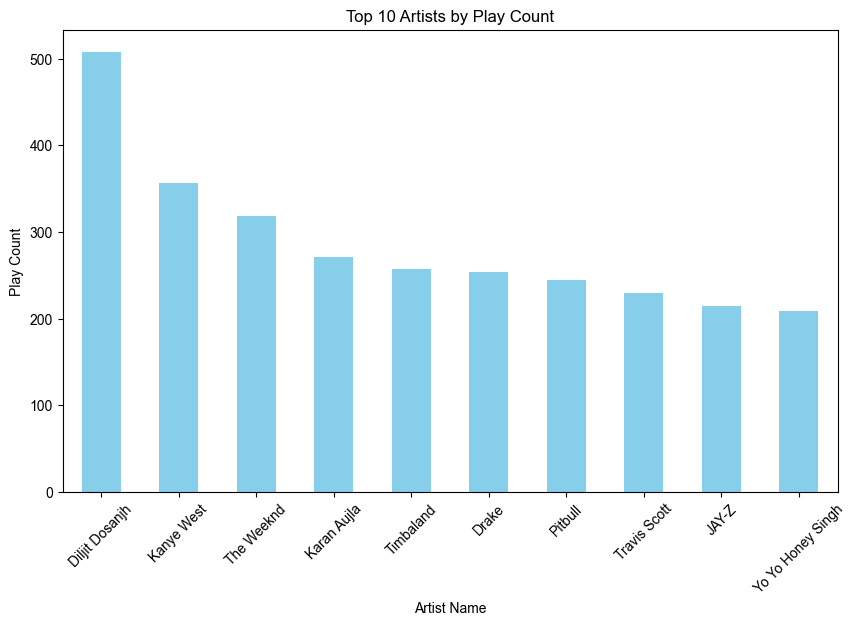

In [283]:
#top 10 artists by play count
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='skyblue')
plt.title('Top 10 Artists by Play Count')
plt.xlabel('Artist Name')
plt.ylabel('Play Count')
plt.xticks(rotation=45)
plt.show()

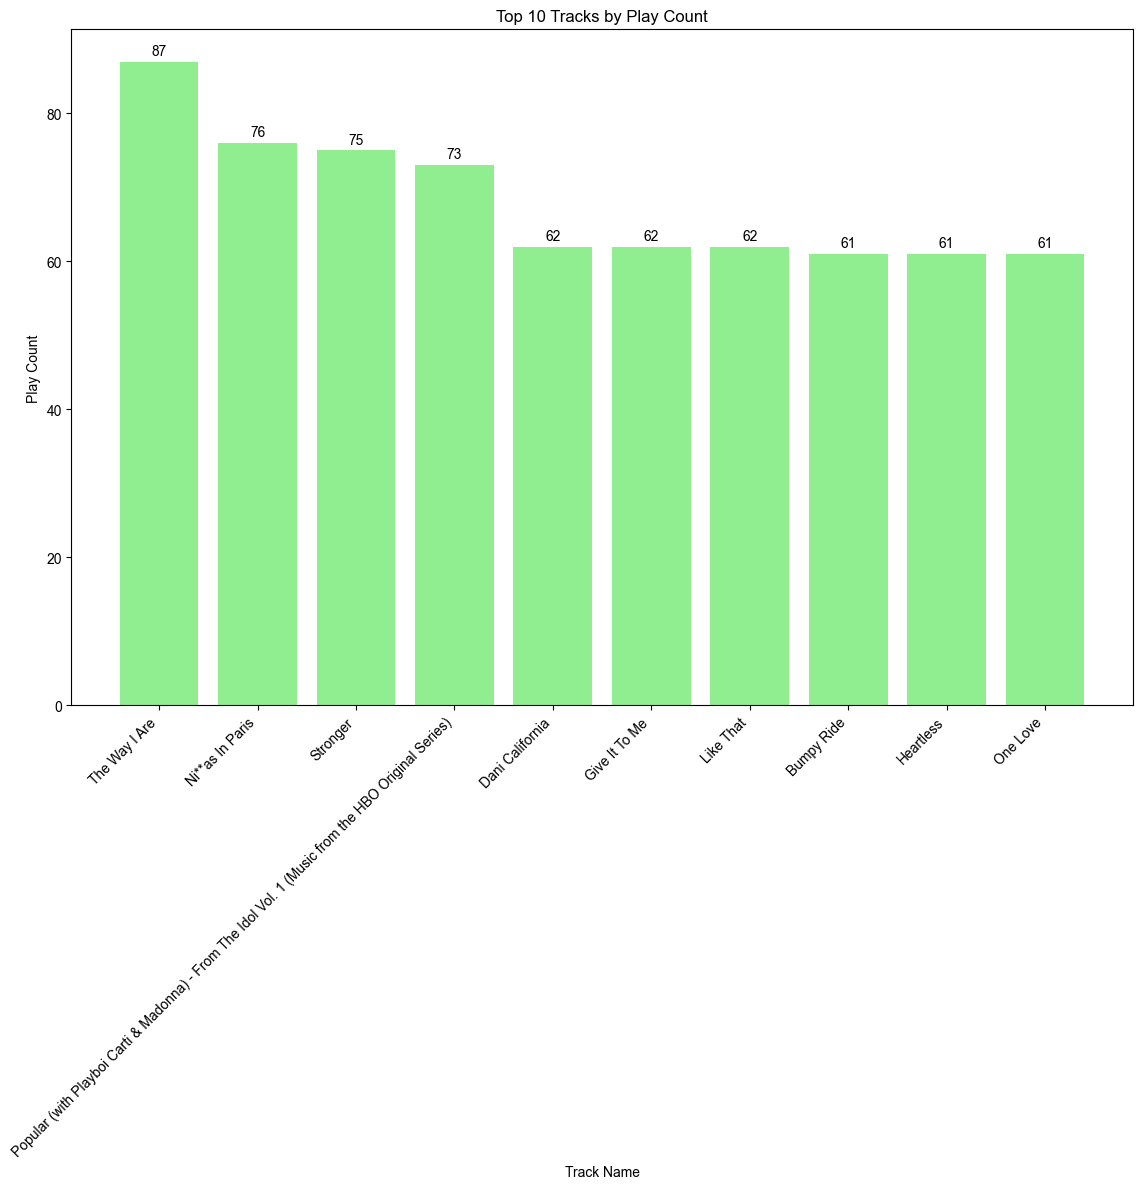

In [284]:
plt.figure(figsize=(12, 12))
bars = plt.bar(top_tracks.index, top_tracks.values, color='lightgreen')

# Add title and labels
plt.title('Top 10 Tracks by Play Count')
plt.xlabel('Track Name')
plt.ylabel('Play Count')
plt.xticks(rotation=45, ha='right')

# Add count labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

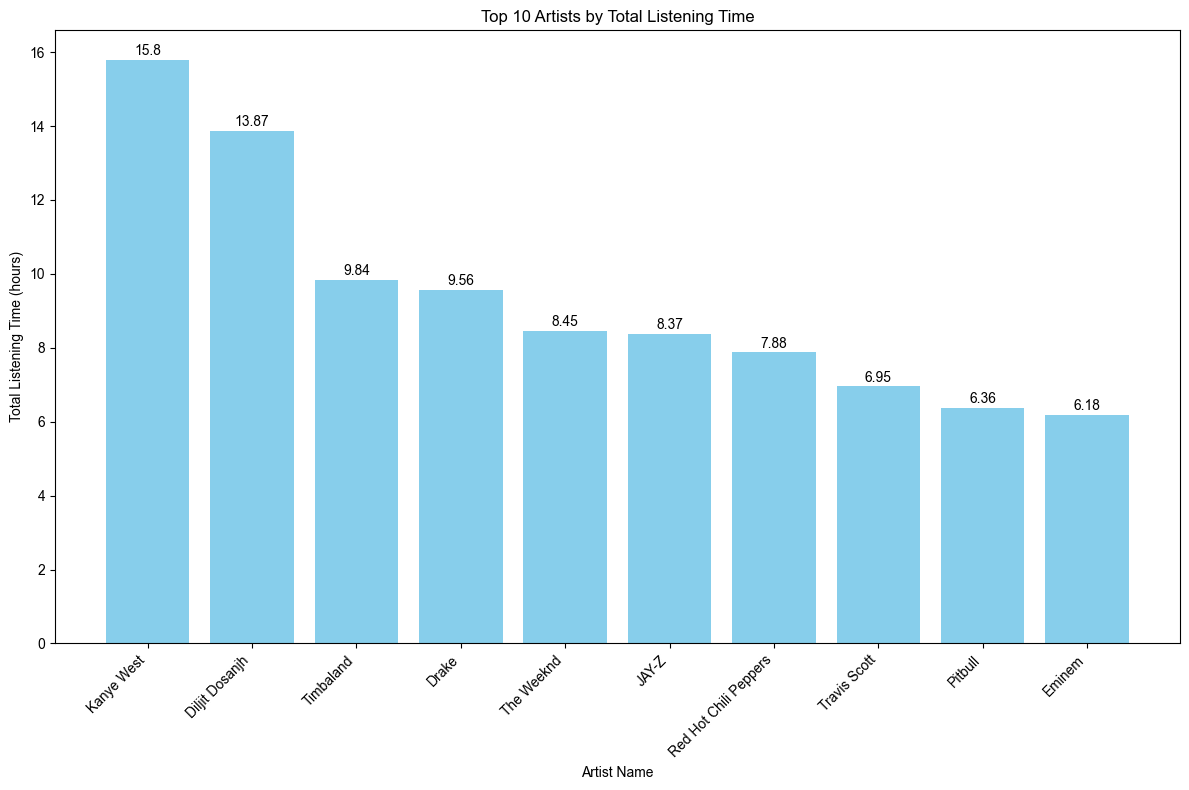

In [285]:
# Total listening time per artist
plt.figure(figsize=(12, 8))
bars = plt.bar(artist_playtime.index, artist_playtime.values, color='skyblue')

# Add title and labels
plt.title('Top 10 Artists by Total Listening Time')
plt.xlabel('Artist Name')
plt.ylabel('Total Listening Time (hours)')
plt.xticks(rotation=45, ha='right')

# Add total listening time labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

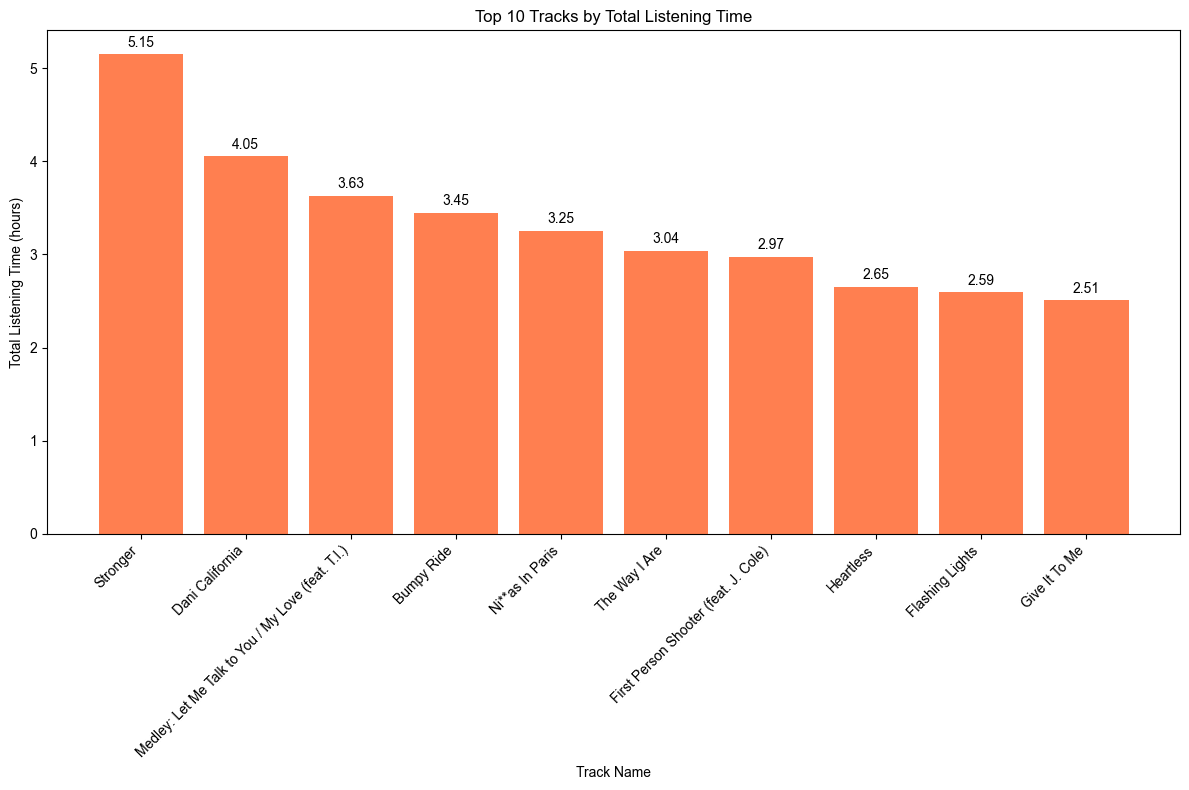

In [286]:
# Total listening time per track
plt.figure(figsize=(12, 8))
bars = plt.bar(track_playtime.index, track_playtime.values, color='coral')

# Add title and labels
plt.title('Top 10 Tracks by Total Listening Time')
plt.xlabel('Track Name')
plt.ylabel('Total Listening Time (hours)')
plt.xticks(rotation=45, ha='right')

# Add total listening time labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

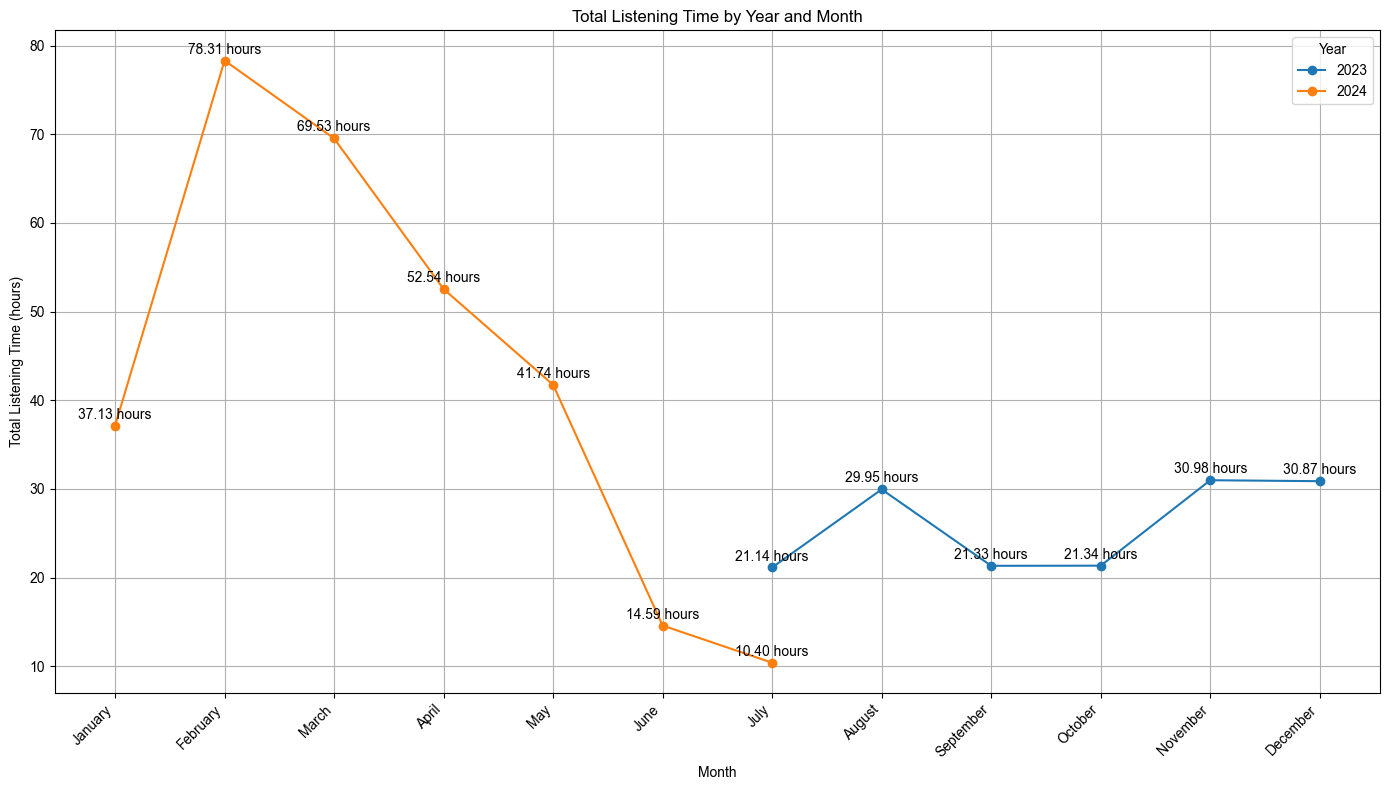

In [287]:
# Total listening time by year and month

# Convert month numbers to month names for plotting
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_playtime['month_name'] = monthly_playtime['month'].apply(lambda x: month_names[x-1])

# Create a figure and plot
plt.figure(figsize=(14, 8))

# Loop through each year and plot its data
for year in monthly_playtime['year'].unique():
    year_data = monthly_playtime[monthly_playtime['year'] == year]
    plt.plot(year_data['month'], year_data['hoursPlayed'], marker='o', label=year)

    # Add data labels (annotations) for each point
    for x, y in zip(year_data['month'], year_data['hoursPlayed']):
        plt.annotate(f'{y:.2f} hours', (x, y), textcoords='offset points', xytext=(0,5), ha='center')

# Add title and labels
plt.title('Total Listening Time by Year and Month')
plt.xlabel('Month')
plt.ylabel('Total Listening Time (hours)')

# Set xticks and labels
plt.xticks(range(1, 13), month_names, rotation=45, ha='right')

plt.legend(title='Year')
plt.tight_layout()
plt.grid(True)
plt.show()

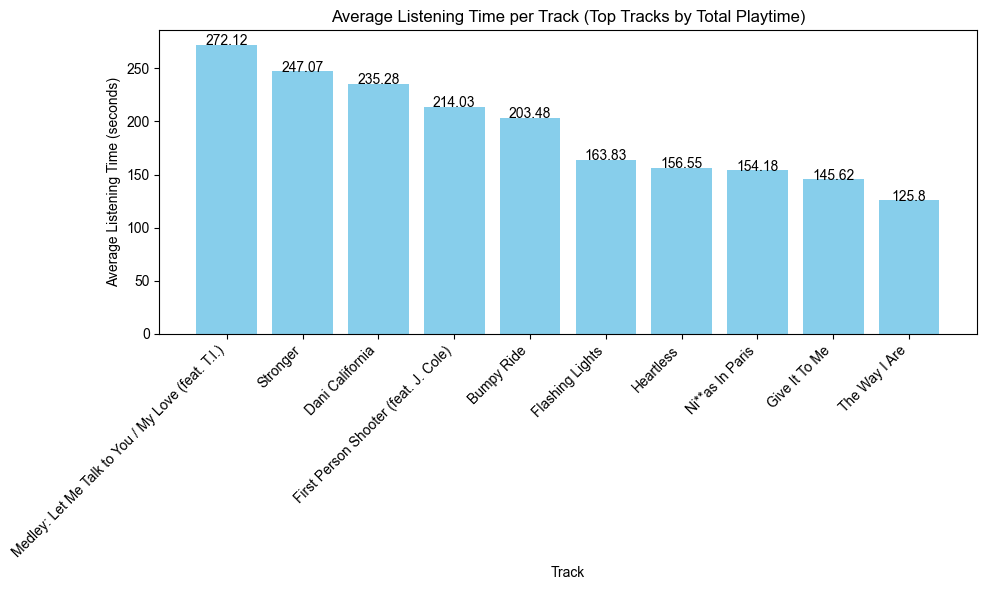

In [288]:
# Average Listening Time per Track (Top Tracks by Total Playtime)
plt.figure(figsize=(10, 6))
bars = plt.bar(average_playtime_top_tracks.index, average_playtime_top_tracks.values, color='skyblue')

# Add labels and title
plt.xlabel('Track')
plt.ylabel('Average Listening Time (seconds)')
plt.title('Average Listening Time per Track (Top Tracks by Total Playtime)')

# Add value labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, round(yval, 2), ha='center', va='top')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

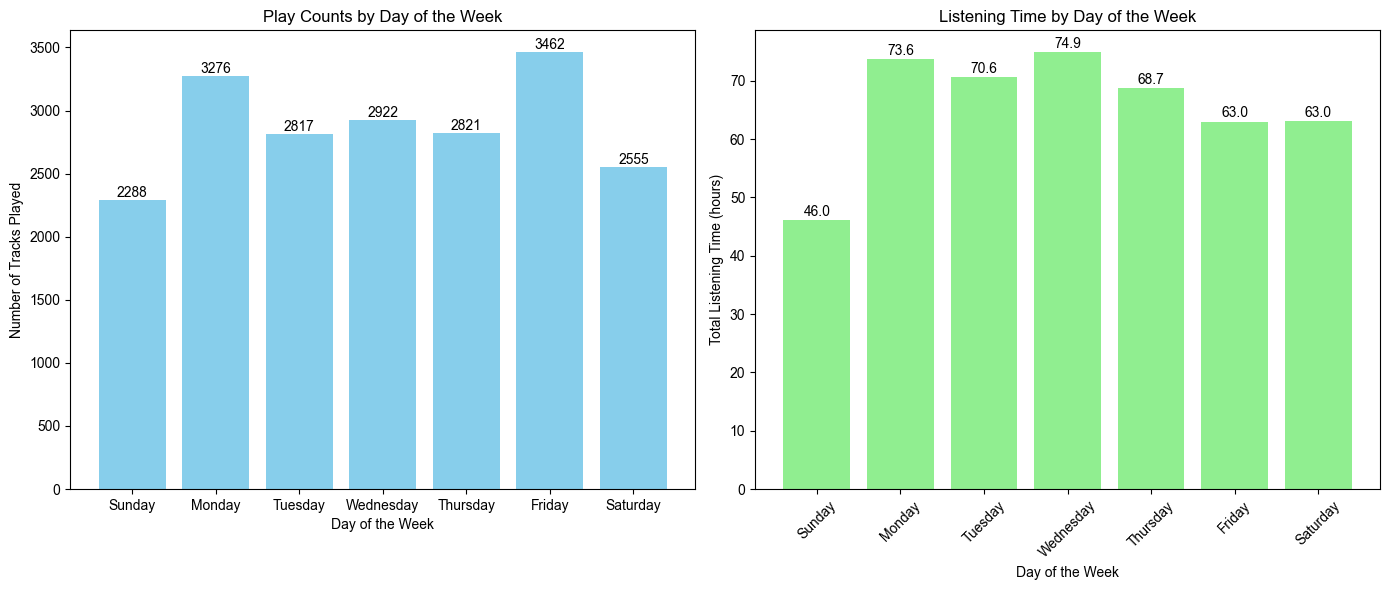

In [289]:
# Play count and Listening time by Day of the week

# Reorder the index to start from Sunday
play_counts_by_day = play_counts_by_day.reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Reorder the data to start from Sunday
listening_time_by_day['endTime'] = pd.Categorical(listening_time_by_day['endTime'], categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], ordered=True)
listening_time_by_day = listening_time_by_day.sort_values('endTime')

# Create visualizations
plt.figure(figsize=(14, 6))

# Plot play counts by day
plt.subplot(1, 2, 1)
bars = plt.bar(play_counts_by_day.index, play_counts_by_day.values, color='skyblue')
plt.title('Play Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tracks Played')

# Add data labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 1), ha='center', va='bottom')

# Plot listening time by day
plt.subplot(1, 2, 2)
bars = plt.bar(listening_time_by_day['endTime'], listening_time_by_day['hoursPlayed'], color='lightgreen')
plt.title('Listening Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Listening Time (hours)')
plt.xticks(rotation=45)

# Add data labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 1), ha='center', va='bottom')

plt.tight_layout()
plt.show()

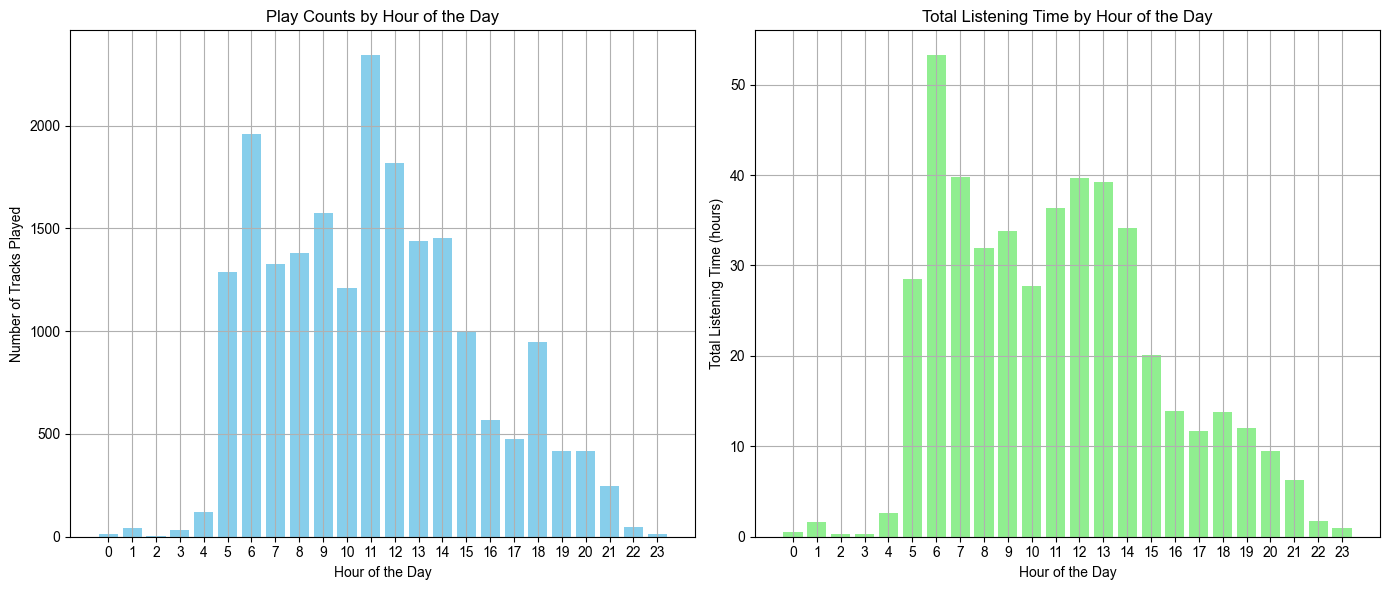

In [290]:
# Listening time and Play Count by Hour of the day

# Create visualization
plt.figure(figsize=(14, 6))

# Plot play counts by hour
plt.subplot(1, 2, 1)
plt.bar(play_counts_by_hour.index, play_counts_by_hour.values, color='skyblue')
plt.title('Play Counts by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tracks Played')
plt.xticks(range(24))
plt.grid(True)

# Plot listening time by hour
plt.subplot(1, 2, 2)
plt.bar(listening_time_by_hour['endTime'], listening_time_by_hour['hoursPlayed'], color='lightgreen')
plt.title('Total Listening Time by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Listening Time (hours)')
plt.xticks(range(24))
plt.grid(True)

plt.tight_layout()
plt.show()

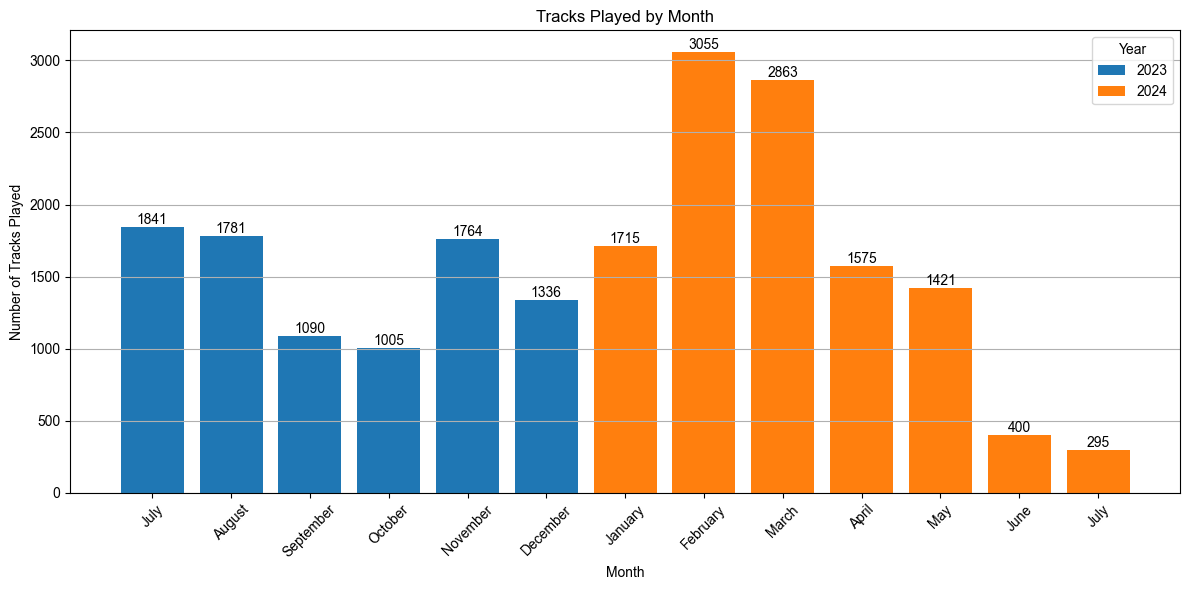

In [291]:
# Group by year and month to get play counts
play_counts = df.groupby(['year', 'month'])['trackName'].count().reset_index()

# Convert month number to month name
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
play_counts['month_name'] = play_counts['month'].apply(lambda x: month_names[x-1])

# Create a figure and plot
plt.figure(figsize=(12, 6))

# Loop through each unique year and plot its data
for year in play_counts['year'].unique():
    year_data = play_counts[play_counts['year'] == year]
    plt.bar(year_data.index, year_data['trackName'], label=str(year))

    # Add data labels (annotations) for each bar
    for i, value in zip(year_data.index, year_data['trackName']):
        plt.text(i, value + 0.2, str(value), ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Tracks Played')
plt.title('Tracks Played by Month')

plt.xticks(play_counts.index, play_counts['month_name'], rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

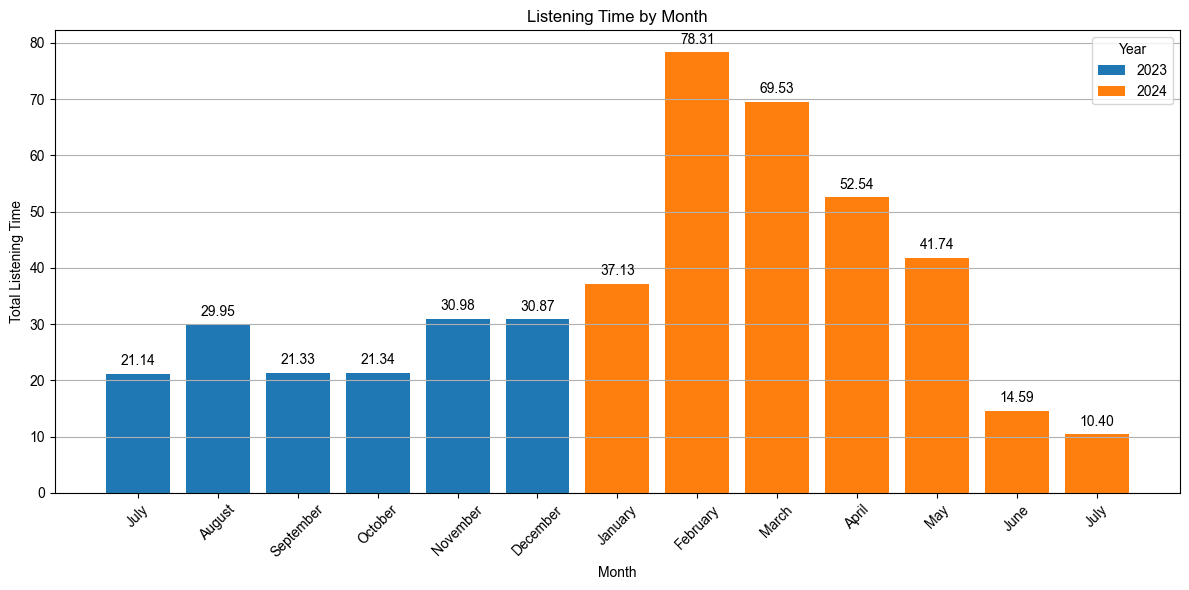

In [293]:
# Convert month number to month name
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
listening_time['month_name'] = listening_time['month'].apply(lambda x: month_names[x-1])

# Create a figure and plot
plt.figure(figsize=(12, 6))

# Loop through each unique year and plot its data
for year in listening_time['year'].unique():
    year_data = listening_time[listening_time['year'] == year]
    plt.bar(year_data.index, year_data['hoursPlayed'], label=str(year))

    # Add data labels (annotations) for each bar
    for i, value in zip(year_data.index, year_data['hoursPlayed']):
        plt.text(i, value + 1, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Listening Time')
plt.title('Listening Time by Month')

plt.xticks(listening_time.index, listening_time['month_name'], rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

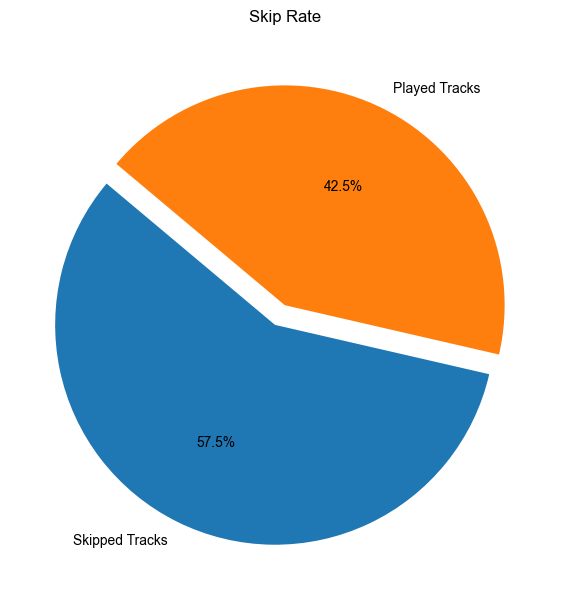

In [299]:
# Plot for skip rate
num_played_tracks = total_tracks - num_skipped_tracks

# Data for skip rate pie chart
labels = ['Skipped Tracks', 'Played Tracks']
sizes = [num_skipped_tracks, num_played_tracks]
colors = ['#1f77b4', '#ff7f0e']  # Blue for skipped, Orange for played
explode = (0.1, 0)  # explode the 1st slice (Skipped Tracks)

# Plot for skip rate
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Skip Rate')
plt.tight_layout()
plt.show()

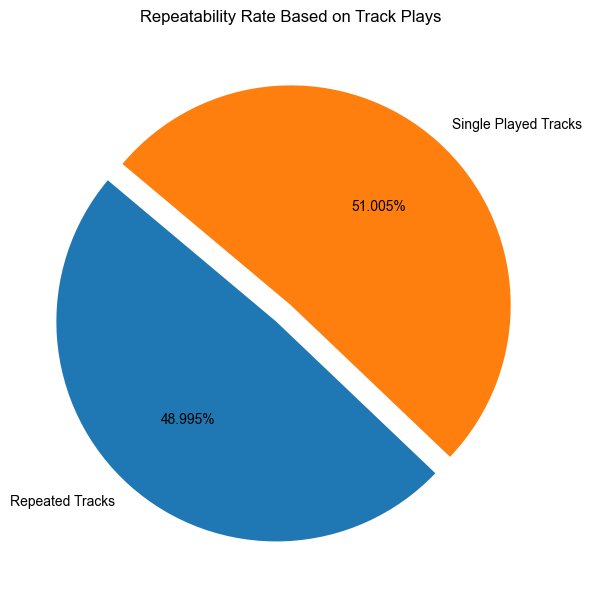

In [295]:
# Plot for repeatability rate
# Data for repeatability rate pie chart
labels = ['Repeated Tracks', 'Single Played Tracks']
sizes = [num_repeated_tracks, total_tracks - num_repeated_tracks]
colors = ['#1f77b4', '#ff7f0e']  # Blue for repeated tracks, Orange for single played tracks
explode = (0.1, 0)  # explode the 1st slice (Repeated Tracks)

# Plot for repeatability rate
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.3f%%', startangle=140)
plt.title('Repeatability Rate Based on Track Plays')

plt.tight_layout()
plt.show()

# **Combining all JSON files and exporting it as CSV**

In [5]:
import os
import pandas as pd

# Directory containing JSON files
directory_path = r'C:\Users\mayan\Desktop\Analyze Spotify Listening Habits and Music Trends\my_spotify_data\Spotify Account Data'

# List all files in the directory
json_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.startswith('StreamingHistory_music')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate through each file and read into a list
for file in json_files:
    df = pd.read_json(file)
    dfs.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

# Save combined DataFrame to CSV
output_csv_path = r'C:\Users\mayan\Desktop\Analyze Spotify Listening Habits and Music Trends\combined_spotify_data.csv'
combined_df.to_csv(output_csv_path, index=False)

print(f"Combined data saved to: {output_csv_path}")


Combined data saved to: C:\Users\mayan\Desktop\Analyze Spotify Listening Habits and Music Trends\combined_spotify_data.csv
